# Отток клиентов

> Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
> Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
> Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
> Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

## Инструкция по выполнению проекта

    1. Загрузите и подготовьте данные. Поясните порядок действий.
    2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
    3. Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
    4. Проведите финальное тестирование.

## Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). Скачать датасет

**Признаки**

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

**Целевой признак**

    Exited — факт ухода клиента

Мы подготовили критерии оценки проекта, которыми руководствуются ревьюеры. Прежде чем приступить к решению кейса, внимательно их изучите.
На что обращают внимание ревьюеры, проверяя проект:

    Как вы готовите данные к обучению? Все ли типы признаков обрабатываете?
    Хорошо ли поясняете этапы предобработки?
    Как исследуете баланс классов?
    Изучаете ли модель без учёта дисбаланса классов?
    Какие выводы об исследовании задачи делаете?
    Корректно ли разбиваете данные на выборки?
    Как работаете с несбалансированными классами?
    Правильно ли проводите обучение, валидацию и финальное тестирование модели?
    Насколько высокое значение F1-меры получаете?
    Изучаете ли значения метрики AUC-ROC?
    Следите за структурой проекта и поддерживаете аккуратность кода?

Всё, что вам нужно знать, есть в шпаргалках и конспектах прошлых тем.

#### Libs

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, precision_recall_curve, plot_confusion_matrix, confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from eli5.sklearn import PermutationImportance
import eli5
import warnings
warnings.filterwarnings('ignore')

### 1. Загрузите и подготовьте данные. Поясните порядок действий.

In [2]:
data = pd.read_csv('Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
print('Процент пропусков по признакам: \n')
for col in data.columns:
    missing_percent = data[col].isna().sum() / data[col].shape[0] * 100
    if missing_percent > 0:
        print(f'{col:<25} {missing_percent:.2f}%')

Процент пропусков по признакам: 

Tenure                    9.09%


##### Имеются пустые значения в колонке Tenure. Заполним их медианным значением, так ка достоверно определить количество лет, которое клиент является клиентом банка определить не удастся, а заполнение 0 может привести к искажению данных.

In [7]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype(int)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int32  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 1.0+ MB


#### Проверим наличие дубликатов

In [9]:
data.duplicated().sum()

0

#### Имеются 3 категориальных признака Surname, Geography, Gender. Признак Surname может быт удален из выборки, так ка на расчет модели не будет влиять. Также уберем RowNumber, CustomerId.

In [10]:
data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Выполним прямое кодирование методом OneHotEncoding для всего датасета, чтобы привести все признаки к количественным значениям.

#### OneHotEncoding

In [12]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [13]:
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


#### Так как использовали аргумент drop_first=True, признака  Gender_Female не оказалось в результирующей выборке. 

#### Приведем признаки к одному масштабу с помощью метода StandardScaler

In [14]:
scaler = StandardScaler()

In [17]:
# Выберем признаки, которые будем масштабировать.

In [15]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [16]:
scaler.fit(data_ohe[numeric])

StandardScaler()

In [17]:
data_ohe[numeric] = scaler.transform(data_ohe[numeric])

In [18]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,1,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,1,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,3,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,2,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,1,1,1,-0.365276,0,0,1,0


#### Разобъем датасет на 3 выборки: тренировочную, валидационную, тестовую в пропорции 3:1:1

In [19]:
features = data_ohe.drop('Exited', axis=1)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,1,1,1,0.021886,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,1,0,1,0.216534,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,3,1,0,0.240687,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,2,0,0,-0.108918,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,1,1,1,-0.365276,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.000761,-1.225848,2,1,0,-0.066419,0,0,1
9996,-1.391939,-0.373958,1.812439,-0.306379,1,1,1,0.027988,0,0,1
9997,0.604988,-0.278604,0.725432,-1.225848,1,0,1,-1.008643,0,0,0
9998,1.256835,0.293517,-0.723910,-0.022608,2,1,0,-0.125231,1,0,1


In [20]:
target = data_ohe['Exited']
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
feature_train, feature_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

In [22]:
print(feature_train.shape)
print(feature_temp.shape)
print(target_train.shape)
print(target_temp.shape)

(6000, 11)
(4000, 11)
(6000,)
(4000,)


In [23]:
feature_valid, feature_test, target_valid, target_test = train_test_split(
    feature_temp, target_temp, test_size=0.5, random_state=12345) 

In [24]:
print(feature_valid.shape)
print(feature_test.shape)
print(target_valid.shape)
print(target_test.shape)

(2000, 11)
(2000, 11)
(2000,)
(2000,)


# Вывод: 
    

На данном этапе:   
    1. Проверили датасет на наличие пустых значений и дублей  
    2. Заменили пустые значение на 0  
    3. С помощью OneHotEncoding преобразовали качественные признаки в количественные  
    4. Масштабировали некоторые признаки  
    5. Разбили датасет на 3 выборки - тренировочную, валидационную, тестовую в пропорции 3:1:1.  

### 2. Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

In [25]:
data_ohe['Exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

#### Класс 0 - 80% данных
#### Класс 1 - 20%.  
#### Явная несбалансированность классов.

### Найдем наиболее точную модель классификации(без изменения гиперпараметров)

In [29]:
def get_best_model(model):
    
    model = model(random_state=12345)
    model.fit(feature_train, target_train)
    predicted_valid = model.predict(feature_valid)
    
    accuracy = accuracy_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    ROC_AUC = roc_auc_score(target_valid, model.predict_proba(feature_valid)[:, 1])
    
    print(f'Модель - {model},\n Accuracy = {accuracy},\n F1_Score {f1}\n')
    print(f'recall = {recall},\n precision={precision},\n ROC_AUC={ROC_AUC}\n')

In [30]:
get_best_model(DecisionTreeClassifier)
get_best_model(RandomForestClassifier)
get_best_model(LogisticRegression)

Модель - DecisionTreeClassifier(random_state=12345),
 Accuracy = 0.7945,
 F1_Score 0.5030229746070133

recall = 0.49760765550239233,
 precision=0.508557457212714,
 ROC_AUC=0.6852766469673781

Модель - RandomForestClassifier(random_state=12345),
 Accuracy = 0.8575,
 F1_Score 0.5739910313901345

recall = 0.45933014354066987,
 precision=0.7649402390438247,
 ROC_AUC=0.8399805829940902

Модель - LogisticRegression(random_state=12345),
 Accuracy = 0.802,
 F1_Score 0.33108108108108103

recall = 0.23444976076555024,
 precision=0.5632183908045977,
 ROC_AUC=0.75880872736951



### Напишем функцию расчета основных метрик и добавления их в сводную таблицу

In [26]:
model = list()
resample = list()
accuracy = list()
precision_0 = list()
precision_1 = list()
recall_0 = list()
recall_1 = list()
F1_score = list()
AUC_ROC = list()

In [27]:
def get_metrics(clf_model, feature_valid, target_valid, name_model=None, sample=None):
    
    target_prob=clf_model.predict_proba(feature_valid)[:, 1]
    target_pred=clf_model.predict(feature_valid)

    print('Confusion Matrix')
    print('__'*30)
    plot_confusion_matrix(clf_model, feature_valid, target_valid)  
    plt.show() 
    print('Classification Report')
    print('__'*30)
    print(classification_report(target_valid, target_pred),"\n")
    print('f1_score')
    print('__'*30)
    print(f1_score(target_valid, target_pred))
          
    model.append(name_model)
    accuracy.append(accuracy_score(target_valid, target_pred))
    precision_0.append(precision_score(target_valid, target_pred, pos_label=0))
    precision_1.append(precision_score(target_valid, target_pred, pos_label=1))
    recall_0.append(recall_score(target_valid,target_pred, pos_label=0))
    recall_1.append(recall_score(target_valid,target_pred, pos_label=1))
    F1_score.append(f1_score(target_valid, target_pred))
    AUC_ROC.append(roc_auc_score(target_valid, target_prob))
    resample.append(sample)

Confusion Matrix
____________________________________________________________


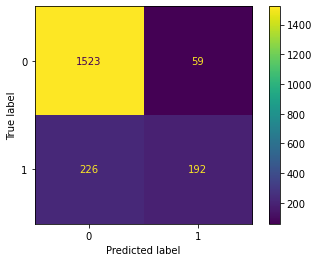

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1582
           1       0.76      0.46      0.57       418

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000
 

f1_score
____________________________________________________________
0.5739910313901345


In [28]:
rfc_model = RandomForestClassifier(random_state=12345).fit(feature_train, target_train)
get_metrics(rfc_model, feature_valid, target_valid, 'RandomForest', 'default')

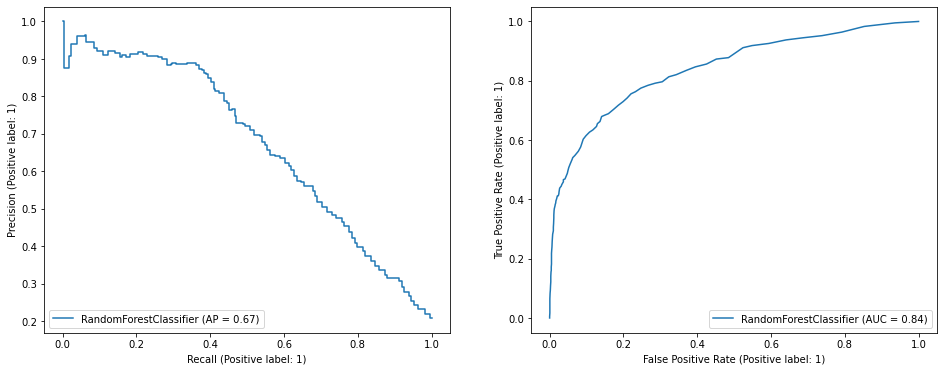

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_precision_recall_curve(rfc_model, feature_valid, target_valid, ax=ax1)
plot_roc_curve(rfc_model, feature_valid, target_valid, ax=ax2)

#### Построим график важности признаков для понимания какие признаки имеют наибольшую значимость при определении целевого признака.

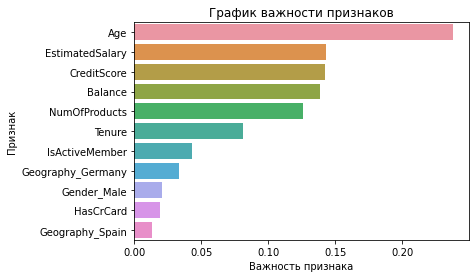

In [30]:
feature_importances = (pd.Series(rfc_model.feature_importances_, 
                                index=feature_train.columns)
                       .sort_values(ascending=False)
                      )
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
ax.set(xlabel='Важность признака', 
       ylabel='Признак')
ax.set_title('График важности признаков');

#### Признака Tenure имеет довольно высокую знаимость при определении целевого признака. Поэтому правильнее было заполнить медианное значение в пропусках вместо 0.

Confusion Matrix
____________________________________________________________


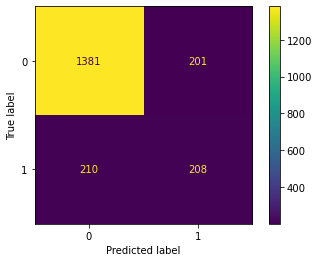

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1582
           1       0.51      0.50      0.50       418

    accuracy                           0.79      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.79      0.79      0.79      2000
 

f1_score
____________________________________________________________
0.5030229746070133


In [32]:
dtc_model = DecisionTreeClassifier(random_state=12345).fit(feature_train, target_train)
get_metrics(dtc_model, feature_valid, target_valid, 'DecisionTree', 'default')

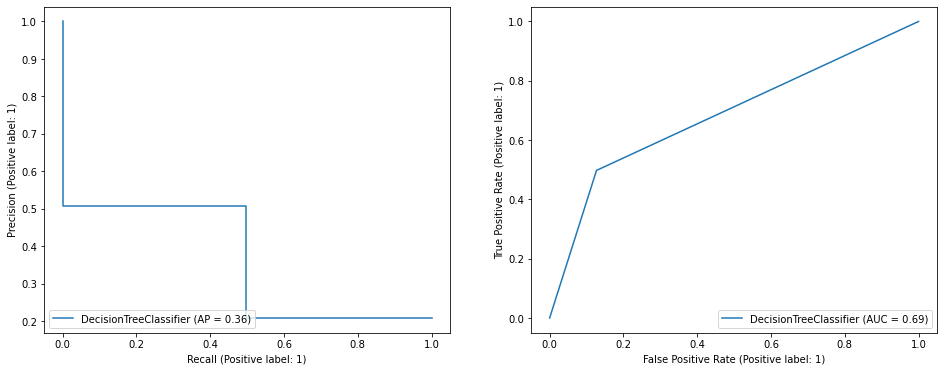

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_precision_recall_curve(dtc_model, feature_valid, target_valid, ax=ax1)
plot_roc_curve(dtc_model, feature_valid, target_valid, ax=ax2)

Confusion Matrix
____________________________________________________________


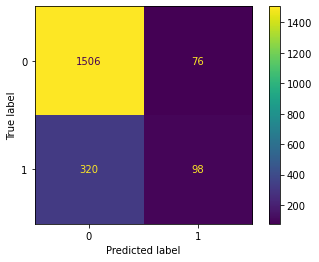

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1582
           1       0.56      0.23      0.33       418

    accuracy                           0.80      2000
   macro avg       0.69      0.59      0.61      2000
weighted avg       0.77      0.80      0.77      2000
 

f1_score
____________________________________________________________
0.33108108108108103


In [34]:
lr_model = LogisticRegression(random_state=12345).fit(feature_train, target_train)
get_metrics(lr_model, feature_valid, target_valid, 'LogisticRegression', 'default')

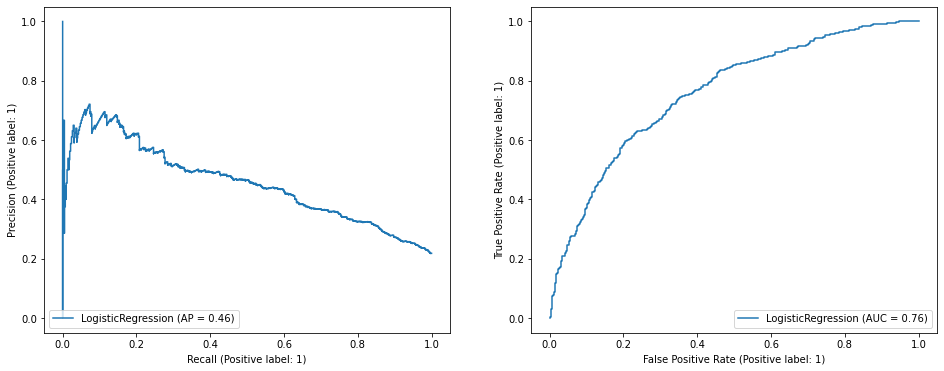

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plot_precision_recall_curve(lr_model, feature_valid, target_valid, ax=ax1)
plot_roc_curve(lr_model, feature_valid, target_valid, ax=ax2)

### Подберем наилучшие параметры, а также сделаем стратификацию, для сглаживания дисбаланса классов

#### LogisticRegression

In [46]:
%%time
lr_best_params = LogisticRegression(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_lr = {'C': np.linspace(0.01, 1, 10)}

# GridSearch

clf_lr = GridSearchCV(
    lr_best_params, params_lr, scoring='f1', cv=cv, n_jobs=-1, verbose=1)
clf_lr.fit(feature_train, target_train)

print('Best f1_score: {:.4}, with best C: {}'.format(
    clf_lr.best_score_, clf_lr.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best f1_score: 0.3124, with best C: {'C': 0.23}
Wall time: 389 ms


Confusion Matrix
____________________________________________________________


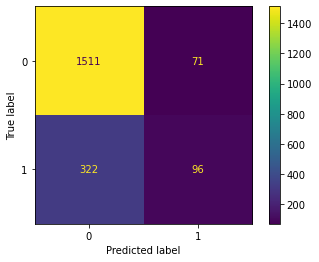

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1582
           1       0.57      0.23      0.33       418

    accuracy                           0.80      2000
   macro avg       0.70      0.59      0.61      2000
weighted avg       0.77      0.80      0.77      2000
 

f1_score
____________________________________________________________
0.3282051282051282


In [47]:
get_metrics(clf_lr, feature_valid, target_valid, 'LogisticRegression', 'best_params')

#### При лучших гиперпараметрах f-мера не увеличилась на модели LogisticRegression

### Построим график Precision-Recall

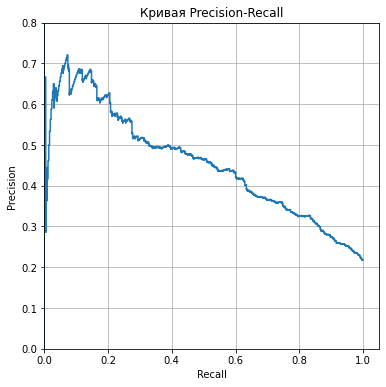

In [41]:
precision, recall, thresholds = precision_recall_curve(target_valid, clf_lr.predict_proba(feature_valid)[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.8])
plt.xlim([0.0, 1.05])
plt.title('Кривая Precision-Recall')
plt.grid()
plt.show()

#### RandomForestClassifier

In [48]:
%%time
rfc_best_params = RandomForestClassifier(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_rf = { 'n_estimators': range(1, 51, 10),
            'max_depth': range(1,21)
         }
# GridSearch

clf_rfc = GridSearchCV(
    rfc_best_params, params_rf, scoring='f1', n_jobs=-1, cv=cv, verbose=1)
clf_rfc.fit(feature_train, target_train)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_rfc.best_score_, clf_rfc.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best f1_score: 0.5898, with best parameters: {'max_depth': 17, 'n_estimators': 21}
Wall time: 15.3 s


Confusion Matrix
____________________________________________________________


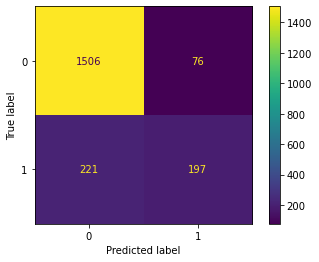

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1582
           1       0.72      0.47      0.57       418

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000
 

f1_score
____________________________________________________________
0.5701881331403763


In [49]:
get_metrics(clf_rfc, feature_valid, target_valid, 'RandomForest', 'best_params')

#### DecisionTreeClassifier

In [50]:
%%time
dtc_best_params = DecisionTreeClassifier(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_tree = {'max_depth': range(1,21)
         }
# GridSearch

clf_dtc = GridSearchCV(
    dtc_best_params, params_tree, scoring='f1', n_jobs=-1, cv=cv, verbose=1)
clf_dtc.fit(feature_train, target_train)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_dtc.best_score_, clf_dtc.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best f1_score: 0.55, with best parameters: {'max_depth': 7}
Wall time: 769 ms


Confusion Matrix
____________________________________________________________


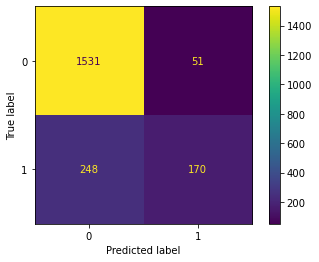

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1582
           1       0.77      0.41      0.53       418

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000
 

f1_score
____________________________________________________________
0.5320813771517998


In [51]:
get_metrics(clf_dtc, feature_valid, target_valid, 'DecisionTree', 'best_params')

### C учетом баланса классов class_weight

#### LogisticRegression

In [52]:
%%time
lr_best_params_balanced = LogisticRegression(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_lr = {'C': np.linspace(0.01, 1, 10)}

# GridSearch

clf_lr_balanced = GridSearchCV(
    lr_best_params_balanced, params_lr, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_lr_balanced.fit(feature_train, target_train)

print('Best f1_score: {:.4}, with best C: {}'.format(
    clf_lr_balanced.best_score_, clf_lr_balanced.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best f1_score: 0.5056, with best C: {'C': 0.23}
Wall time: 371 ms


Confusion Matrix
____________________________________________________________


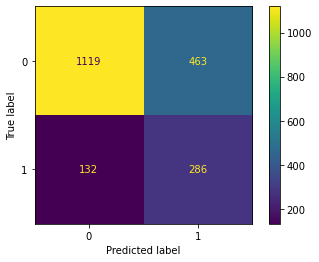

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1582
           1       0.38      0.68      0.49       418

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000
 

f1_score
____________________________________________________________
0.4901456726649529


In [53]:
get_metrics(clf_lr_balanced, feature_valid, target_valid, 'LogisticRegression', 'best_params_balanced')

#### При применении параметра class_weight, f1_score вырос с 0.33 до 0.49

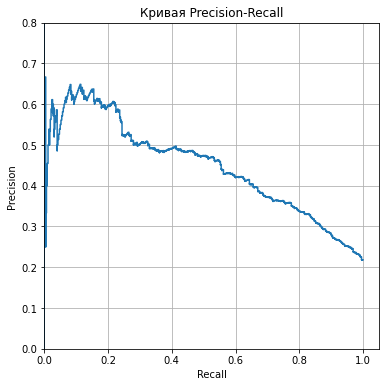

In [54]:
precision, recall, thresholds = precision_recall_curve(target_valid, clf_lr_balanced.predict_proba(feature_valid)[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 0.8])
plt.xlim([0.0, 1.05])
plt.title('Кривая Precision-Recall')
plt.grid()
plt.show()

### RandomForest

In [55]:
%%time
rfc_best_params_balanced = RandomForestClassifier(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_rf = { 'n_estimators': range(1, 51, 10),
            'max_depth': range(1,21)
         }
# GridSearch

clf_rfc_balanced = GridSearchCV(
    rfc_best_params_balanced, params_rf, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_rfc_balanced.fit(feature_train, target_train)
clf_rfc_balanced_pred = clf_rfc_balanced.predict(feature_valid)
print(f1_score(target_valid, clf_rfc_balanced_pred))

print('Best f1_score: {:.4}, with best parameters: {} '.format(
    clf_rfc_balanced.best_score_, clf_rfc_balanced.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.6189473684210526
Best f1_score: 0.6403, with best parameters: {'max_depth': 7, 'n_estimators': 41} 
Wall time: 15.4 s


Confusion Matrix
____________________________________________________________


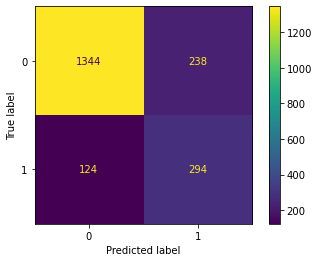

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1582
           1       0.55      0.70      0.62       418

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000
 

f1_score
____________________________________________________________
0.6189473684210526


In [56]:
get_metrics(clf_rfc_balanced, feature_valid, target_valid, 'RandomForest', 'best_params_balanced')

#### При применении параметра class_weight, f1_score вырос с 0.57 до 0.61

#### DecisionTree

In [57]:
%%time
dtc_best_params_balanced = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_tree = {'max_depth': range(1,31)
         }
# GridSearch

clf_dtc_balanced = GridSearchCV(
    dtc_best_params_balanced, params_tree, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_dtc_balanced.fit(feature_train, target_train)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_dtc_balanced.best_score_, clf_dtc_balanced.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best f1_score: 0.5753, with best parameters: {'max_depth': 6}
Wall time: 1.18 s


Confusion Matrix
____________________________________________________________


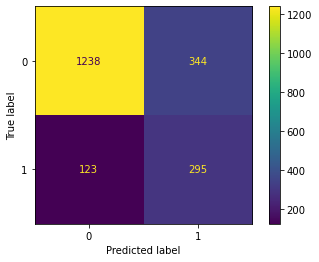

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1582
           1       0.46      0.71      0.56       418

    accuracy                           0.77      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.77      0.78      2000
 

f1_score
____________________________________________________________
0.5581835383159887


In [58]:
get_metrics(clf_dtc_balanced, feature_valid, target_valid, 'DecisionTree', 'best_params_balanced')

#### При применении параметра class_weight, f1_score вырос с 0.53 до 0.55

### Общий вывод: f1 score после настройки гиперпараметров и применения стандартной балансировки с 0.573991 до 0.618947 на наилучшей модели RandomForest.
### При этом произошло снижение accuracy с 0.8575 до 0.8190, precision_1 с 0.764940 до 0.552632, recall_1. Вырос recall_1 с 0.459330 до 0.703349. AUC_ROC получили самый высокий показатель 0.852360 именно при настройке параметров.

### Построим кривую ROC_AUC для 3-х моделей по валидационной выборке

In [59]:
predict_proba_tree = clf_dtc_balanced.predict_proba(feature_valid)[:, 1]

In [60]:
predict_proba_rf = clf_rfc_balanced.predict_proba(feature_valid)[:, 1]

In [61]:
predict_proba_lr = clf_lr_balanced.predict_proba(feature_valid)[:, 1]

ROC-AUC_score_DecisionTree: 0.7999473744699641
ROC-AUC_score_RandomForest: 0.8523596803755165
ROC-AUC_score_LogisticRegression: 0.7640531336386017


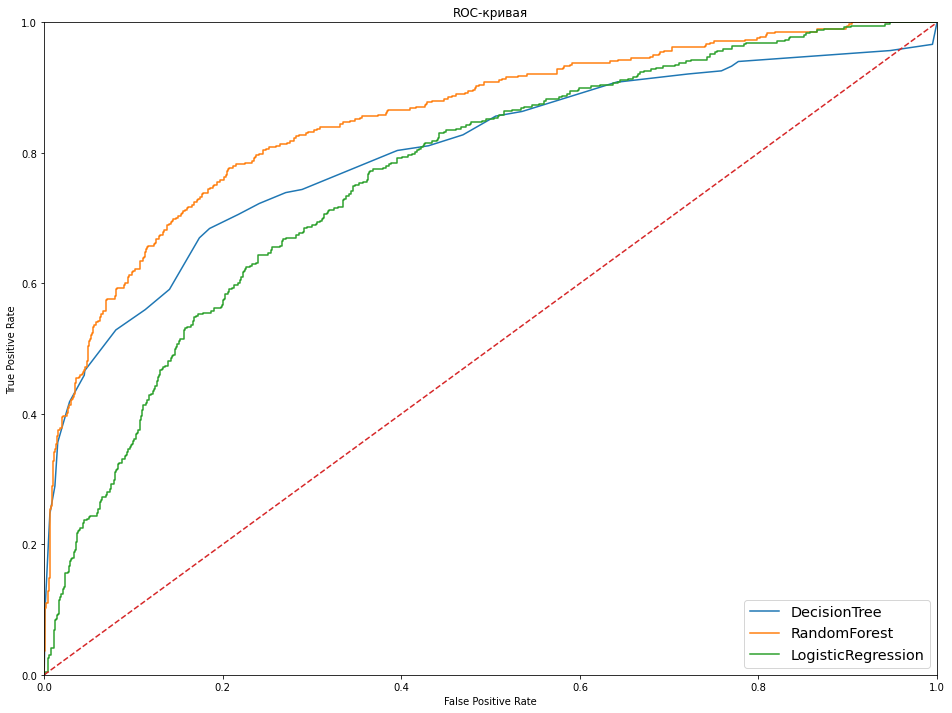

In [62]:
plt.figure(figsize=(16, 12))

fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid, predict_proba_tree)
plt.plot(fpr_tree, tpr_tree, label='DecisionTree')
print('ROC-AUC_score_DecisionTree:', roc_auc_score(target_valid, predict_proba_tree))

fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid, predict_proba_rf)
plt.plot(fpr_forest, tpr_forest, label='RandomForest')
print('ROC-AUC_score_RandomForest:', roc_auc_score(target_valid, predict_proba_rf))

fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(target_valid, predict_proba_lr)
plt.plot(fpr_logistic, tpr_logistic, label='LogisticRegression')
print('ROC-AUC_score_LogisticRegression:', roc_auc_score(target_valid, predict_proba_lr))

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

#   Установим границы осей от 0 до 1 
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='x-large')

plt.title('ROC-кривая')
plt.show()

### Увеличим размер выборки методом undersapling

Напишем функцию, которая будет принимать на вход аргументы: оцениваемые признаки, целевой признак, количество повторений и увеличивать размера выборки по меньшему классу.

In [58]:
def upsampling(feature, target, repeat):
        
    """
    Функция формирует новую выборку по исходной, увеличивая элементы меньшего класса в количество раз, 
    указанное в переменной repeat.
    
    Выполнение происходит в несколько этапов:
    
    1. Обучающая выборка разделяется на отрицательные и положительные объекты;
    2. Элементы меньшего класса умножаются на переменную repeat;
    3. Из полученных данных создается новая выборка;
    4. Выборка перемешивается.
    """
    features_ones = feature[target == 1]
    features_zeroes = feature[target == 0]
    target_ones = target[target == 1]
    target_zeroes = target[target == 0]
    
    features_upsampled = pd.concat([features_zeroes] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeroes] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [59]:
features_upsampled, target_upsampled = upsampling(feature_train, target_train, 4)

#### Проверим выборки по размеру

In [60]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


In [61]:
target_upsampled.value_counts(normalize=True)
# Выборки практически равные

0    0.501043
1    0.498957
Name: Exited, dtype: float64

**LogisticRegression**

In [62]:
%%time
lr_upsampled = LogisticRegression(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params = {'C': np.linspace(0.01, 1, 10)}

# GridSearch

clf_lr_upsampled  = GridSearchCV(
    lr_upsampled, params, scoring='f1', refit=True, cv=cv)
clf_lr_upsampled.fit(features_upsampled, target_upsampled)

print('Best f1_score: {:.4}, with best C: {}'.format(
    clf_lr_upsampled.best_score_, clf_lr_upsampled.best_params_))

Best f1_score: 0.7088, with best C: {'C': 0.12}
Wall time: 1.14 s


Confusion Matrix
____________________________________________________________


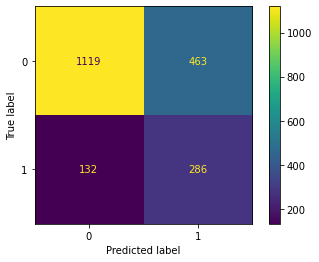

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1582
           1       0.38      0.68      0.49       418

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.73      2000
 

f1_score
____________________________________________________________
0.4901456726649529


In [63]:
get_metrics(clf_lr_upsampled, feature_valid, target_valid, 'LogisticRegression', 'upsampled')

**RandomForest**

In [64]:
%%time
rfc_upsampled = RandomForestClassifier(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params = { 'n_estimators': range(1, 51, 10),
            'max_depth': range(1,21)
         }
# GridSearch

clf_rfc_upsampled  = GridSearchCV(
    rfc_upsampled, params, scoring='f1', refit=True, cv=cv)
clf_rfc_upsampled.fit(features_upsampled, target_upsampled)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_rfc_upsampled.best_score_, clf_rfc_upsampled.best_params_))

Best f1_score: 0.9609, with best parameters: {'max_depth': 20, 'n_estimators': 31}
Wall time: 1min 19s


Confusion Matrix
____________________________________________________________


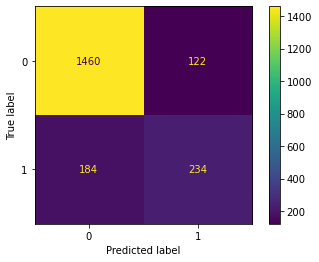

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1582
           1       0.66      0.56      0.60       418

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000
 

f1_score
____________________________________________________________
0.6046511627906977


In [66]:
get_metrics(clf_rfc_upsampled, feature_valid, target_valid, 'RandomForest', 'upsampled')

**DecisionTree**

In [75]:
%%time
dtc_upsampled = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params = {'max_depth': range(1,21)
         }
# GridSearch

clf_dtc_upsampled = GridSearchCV(
    dtc_upsampled, params, scoring='f1', refit=True, cv=cv)
clf_dtc_upsampled.fit(features_upsampled, target_upsampled)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_dtc_upsampled.best_score_, clf_dtc_upsampled.best_params_))

Best f1_score: 0.9367, with best parameters: {'max_depth': 19}
Wall time: 3.1 s


Confusion Matrix
____________________________________________________________


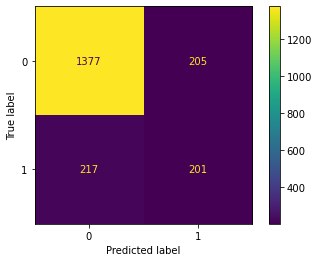

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1582
           1       0.50      0.48      0.49       418

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000
 

f1_score
____________________________________________________________
0.4878640776699029


In [76]:
get_metrics(clf_dtc_upsampled, feature_valid, target_valid, 'DecisionTree', 'upsampled')

,model,resample,accuracy,precision_0,precision_1,recall_0,recall_1,f1-score,AUC-ROC
1,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
5,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
8,DecisionTree,best_params_balanced,0.7665,0.909625,0.461659,0.782554,0.705742,0.558184,0.799947
12,DecisionTree,upsampled,0.7910,0.863750,0.500000,0.873578,0.478469,0.488998,0.676477
2,LogisticRegression,default,0.8020,0.824754,0.563218,0.951960,0.234450,0.331081,0.758809
3,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451
6,LogisticRegression,best_params_balanced,0.7025,0.894484,0.381842,0.707332,0.684211,0.490146,0.764053
9,LogisticRegression,upsampled,0.7025,0.894484,0.381842,0.707332,0.684211,0.490146,0.764154
0,RandomForest,default,0.8575,0.870783,0.764940,0.962705,0.459330,0.573991,0.839981
4,RandomForest,best_params,0.8515,0.872032,0.721612,0.951960,0.471292,0.570188,0.828354


#### Увеличение класса помогло повысить f-меру до 0.604651 (больше чем на 3% от ненастроенной модели), но при этом лучшей модель остается RandomForest с настроенными гиперпараметрами и балансировкой классов.
#### В то же время увеличение меньшего класса помогло повысить метрику accuracy на ~ 3% относительной лучшей модели астроенными гиперпараметрами и балансировкой классов. Также повысилась метрика precision_1	до 0.657303, recall_1 до 0.559809.  


### Попробуем добавить объектов недостающего класса c помощью метода RandomOverSampler

In [63]:
oversample = RandomOverSampler(sampling_strategy=1.0)
feature_over, target_over = oversample.fit_resample(feature_train, target_train)

In [64]:
feature_over.shape, target_over.shape

((9608, 11), (9608,))

**RandomForest**

In [65]:
%%time
rfc_oversampled = RandomForestClassifier(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_rf = { 'n_estimators': range(1, 51, 10),
            'max_depth': range(1,21)
         }
# GridSearch

clf_rfc_oversampled  = GridSearchCV(
    rfc_oversampled, params_rf, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_rfc_oversampled.fit(feature_over, target_over)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_rfc_oversampled.best_score_, clf_rfc_oversampled.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best f1_score: 0.964, with best parameters: {'max_depth': 20, 'n_estimators': 41}
Wall time: 28.1 s


Confusion Matrix
____________________________________________________________


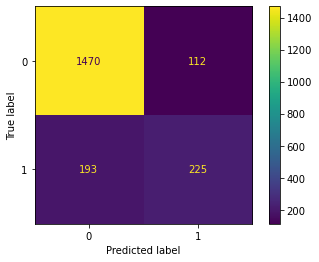

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1582
           1       0.67      0.54      0.60       418

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000
 

f1_score
____________________________________________________________
0.5960264900662252


In [66]:
get_metrics(clf_rfc_oversampled, feature_valid, target_valid, 'RandomForest', 'oversampled')

**DecisionTree**

In [67]:
%%time
dtc_oversampled = DecisionTreeClassifier(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_tree = {'max_depth': range(1,21)
         }
# GridSearch

clf_dtc_oversampled = GridSearchCV(
    dtc_oversampled, params_tree, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_dtc_oversampled.fit(feature_over, target_over)

print('Best f1_score: {:.4}, with best parameters: {}'.format(
    clf_dtc_oversampled.best_score_, clf_dtc_oversampled.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best f1_score: 0.9401, with best parameters: {'max_depth': 20}
Wall time: 948 ms


Confusion Matrix
____________________________________________________________


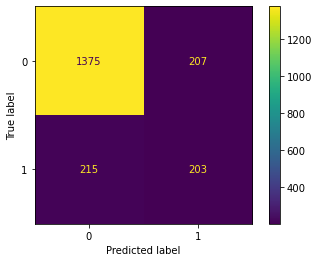

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1582
           1       0.50      0.49      0.49       418

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000
 

f1_score
____________________________________________________________
0.49033816425120774


In [68]:
get_metrics(clf_dtc_oversampled, feature_valid, target_valid, 'DecisionTree', 'oversampled')

**LogisticRegression**

In [69]:
%%time
lr_oversampled = LogisticRegression(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_lr = {'C': np.linspace(0.01, 1, 10)}

# GridSearch

clf_lr_oversampled   = GridSearchCV(
    lr_oversampled, params_lr, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_lr_oversampled.fit(feature_over, target_over)

print('Best f1_score: {:.4}, with best C: {}'.format(
    clf_lr_oversampled.best_score_, clf_lr_oversampled.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best f1_score: 0.7163, with best C: {'C': 0.12}
Wall time: 486 ms


Confusion Matrix
____________________________________________________________


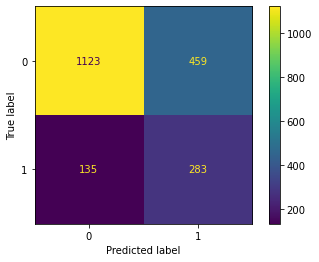

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1582
           1       0.38      0.68      0.49       418

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.79      0.70      0.73      2000
 

f1_score
____________________________________________________________
0.48793103448275865


In [70]:
get_metrics(clf_lr_oversampled, feature_valid, target_valid, 'LogisticRegression', 'oversampled')

#### В моделях RF и DecisionTree видим снижение f-меры по сравнению со значениями полученными при применении баланса классов с помощью class_weight

In [71]:
metrics_report = pd.DataFrame({'model':model,
                            'resample':resample,
                            'accuracy':accuracy,
                            'precision_0':precision_0,
                            'precision_1':precision_1,
                            'recall_0':recall_0,
                            'recall_1':recall_1,
                            'f1-score':F1_score,
                            'AUC-ROC':AUC_ROC})
metrics_report.sort_values('model')

,model,resample,accuracy,precision_0,precision_1,recall_0,recall_1,f1-score,AUC-ROC
1,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
2,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
6,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
9,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
12,DecisionTree,best_params_balanced,0.7665,0.909625,0.461659,0.782554,0.705742,0.558184,0.799947
14,DecisionTree,oversampled,0.7890,0.864780,0.495122,0.869153,0.485646,0.490338,0.678743
3,LogisticRegression,default,0.8020,0.824754,0.563218,0.951960,0.234450,0.331081,0.758809
4,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451
7,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451
10,LogisticRegression,best_params_balanced,0.7025,0.894484,0.381842,0.707332,0.684211,0.490146,0.764053


#### Моделирование при помощи RandomOverSampler не улучшило метрики модели на валидационной выборке по сравнению с oversampled

# 4. Проведите финальное тестирование.

#### Возьмем модель с лучшими гиперпараметрами и проверим ее на тестовых данных.

In [72]:
%%time
rfc_test = RandomForestClassifier(random_state=12345, class_weight='balanced')

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params_rf = { 'n_estimators': range(1, 51, 10),
            'max_depth': range(1,21)
            }

# GridSearch
clf_rfc_test = GridSearchCV(
    rfc_test, params_rf, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_rfc_test.fit(feature_train, target_train)
clf_rfc_test_pred = clf_rfc_test.predict(feature_test)
clf_rfc_test_proba_one = clf_rfc_test.predict_proba(feature_test)[:,1]
print(f1_score(target_test, clf_rfc_test_pred))

print('Best f1_score: {:.4}, with best parameters: {} '.format(
    clf_rfc_test.best_score_, clf_rfc_test.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.6024844720496895
Best f1_score: 0.6403, with best parameters: {'max_depth': 7, 'n_estimators': 41} 
Wall time: 15.4 s


Confusion Matrix
____________________________________________________________


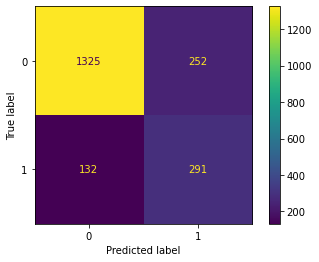

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1577
           1       0.54      0.69      0.60       423

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000
 

f1_score
____________________________________________________________
0.6024844720496895


In [74]:
get_metrics(clf_rfc_test, feature_test, target_test, 'RandomForest', 'final_test')

#### Метрика f1 достигла целевого уровня 0.59 на тестовых данных при использовании модели RF c наилучшими гиперпараметрами и балансом классов (параметр class_weight='balanced')

#### Попытаемся переобучить модель по увеличенной выборке.

In [75]:
%%time
rfc_test2 = RandomForestClassifier(random_state=12345)

# Stratification
cv = StratifiedShuffleSplit(n_splits=5, random_state=12345)

params = {'n_estimators': range(1, 51, 10),
          'max_depth': range(1,21)
         }

# GridSearch
clf_rfc_test2 = GridSearchCV(
    rfc_test2, params, scoring='f1', n_jobs=-1, verbose=1, cv=cv)
clf_rfc_test2.fit(feature_over, target_over)
clf_rfc_test_pred2 = clf_rfc_test2.predict(feature_test)
clf_rfc_test_proba_one2 = clf_rfc_test2.predict_proba(feature_test)[:,1]
print(f1_score(target_test, clf_rfc_test_pred2))

print('Best f1_score: {:.4}, with best parameters: {} '.format(
    clf_rfc_test2.best_score_, clf_rfc_test2.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.5893333333333334
Best f1_score: 0.964, with best parameters: {'max_depth': 20, 'n_estimators': 41} 
Wall time: 21.6 s


Confusion Matrix
____________________________________________________________


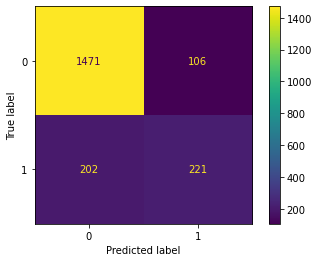

Classification Report
____________________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1577
           1       0.68      0.52      0.59       423

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000
 

f1_score
____________________________________________________________
0.5893333333333334


In [76]:
get_metrics(clf_rfc_test2, feature_test, target_test, 'RandomForest', 'test_oversampled')

In [77]:
metrics_report = pd.DataFrame({'model':model,
                            'resample':resample,
                            'accuracy':accuracy,
                            'precision_0':precision_0,
                            'precision_1':precision_1,
                            'recall_0':recall_0,
                            'recall_1':recall_1,
                            'f1-score':F1_score,
                            'AUC-ROC':AUC_ROC})
metrics_report.sort_values('model')

,model,resample,accuracy,precision_0,precision_1,recall_0,recall_1,f1-score,AUC-ROC
1,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
2,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
6,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
14,DecisionTree,oversampled,0.7890,0.864780,0.495122,0.869153,0.485646,0.490338,0.678743
9,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
12,DecisionTree,best_params_balanced,0.7665,0.909625,0.461659,0.782554,0.705742,0.558184,0.799947
3,LogisticRegression,default,0.8020,0.824754,0.563218,0.951960,0.234450,0.331081,0.758809
4,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451
15,LogisticRegression,oversampled,0.7030,0.892687,0.381402,0.709861,0.677033,0.487931,0.763146
7,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451


In [78]:
metrics_report.sort_values('model')

,model,resample,accuracy,precision_0,precision_1,recall_0,recall_1,f1-score,AUC-ROC
1,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
2,DecisionTree,default,0.7945,0.868008,0.508557,0.872946,0.497608,0.503023,0.685277
6,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
14,DecisionTree,oversampled,0.7890,0.864780,0.495122,0.869153,0.485646,0.490338,0.678743
9,DecisionTree,best_params,0.8505,0.860596,0.769231,0.967762,0.406699,0.532081,0.813853
12,DecisionTree,best_params_balanced,0.7665,0.909625,0.461659,0.782554,0.705742,0.558184,0.799947
3,LogisticRegression,default,0.8020,0.824754,0.563218,0.951960,0.234450,0.331081,0.758809
4,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451
15,LogisticRegression,oversampled,0.7030,0.892687,0.381402,0.709861,0.677033,0.487931,0.763146
7,LogisticRegression,best_params,0.8035,0.824332,0.574850,0.955120,0.229665,0.328205,0.759451


#### f1_score и AUC_ROC уменьшились относительно прогноза по валидационной выборке. . При этом f1 score превысило 0.59.

### Построим ROC-кривую по тестовой выборке.

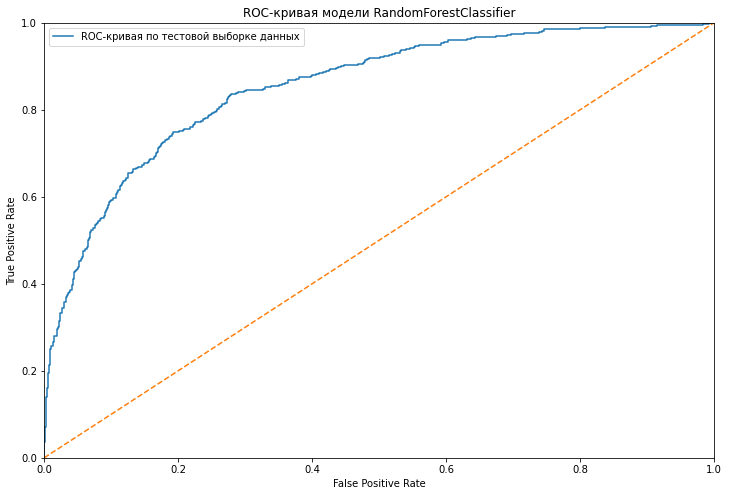

ROC-AUC_score:  0.8520067579013331


In [81]:
fpr_rf_test, tpr_rf_test, threshold_rf_test = roc_curve(target_test, clf_rfc_test_proba_one)

plt.figure(figsize=(12, 8))
plt.plot(fpr_rf_test, tpr_rf_test, label='ROC-кривая по тестовой выборке данных')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая модели RandomForestClassifier')
plt.show()

print('ROC-AUC_score: ', roc_auc_score(target_test, clf_rfc_test_proba_one))

#### Влияние признаков на целевой признак на тестовой выборке

In [90]:
permutation = PermutationImportance(clf_rfc_test, scoring='f1').fit(feature_test, target_test)

In [91]:
eli5.show_weights(permutation, feature_names=feature_test.columns.tolist())

Weight,Feature
0.1811 ± 0.0244,Age
0.1077 ± 0.0076,NumOfProducts
0.0385 ± 0.0123,Geography_Germany
0.0341 ± 0.0125,Balance
0.0304 ± 0.0084,IsActiveMember
0.0008 ± 0.0102,Gender_Male
-0.0005 ± 0.0023,Geography_Spain
-0.0008 ± 0.0080,Tenure
-0.0025 ± 0.0048,HasCrCard
-0.0045 ± 0.0063,EstimatedSalary


# Вывод:
    Самые высокие значения по f1 и roc_auc_score получили при применении oversampling к валидационной выборке.
    f1-score превысил целевое значение на тестоввой выборке и достиг значения - 0.602484.
    